In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.optimizers.legacy import Adam, RMSprop, SGD
from tensorflow.keras import activations
from tensorflow.keras.layers import ReLU


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasRegressor

from scikeras.wrappers import KerasClassifier
import pandas as pd
import seaborn as sns

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


x_train, x_valid, y_train_cat, y_valid = train_test_split(x_train, y_train_cat, test_size=10000, random_state=42)

In [3]:
x_train_20000, _, y_train_20000, _ = train_test_split(x_train, y_train_cat, train_size=20000, random_state=42)

In [4]:
def create_model(optimizer=Adam(), activation='relu',loss = 'categorical_crossentropy', bias=True):
    model = keras.Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation=activation, use_bias=bias),
        Dropout(0.2),
        Dense(10, activation='softmax', use_bias=bias)
    ])
    model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])
    return model


In [5]:
model =  create_model()

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3210 - accuracy: 0.9072 - val_loss: 0.1521 - val_accuracy: 0.9559
Epoch 2/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1547 - accuracy: 0.9549 - val_loss: 0.1181 - val_accuracy: 0.9642
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1159 - accuracy: 0.9649 - val_loss: 0.0935 - val_accuracy: 0.9736
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0795 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.0803 - val_accuracy: 0.9769
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0768 - val_accura

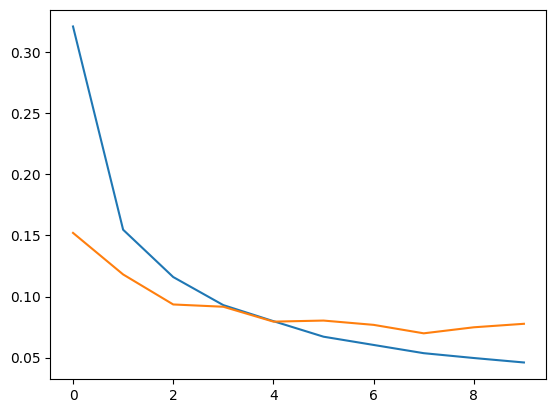

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9778


[0.07544808089733124, 0.9778000116348267]

In [7]:
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [8]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9778


[0.07544808089733124, 0.9778000116348267]

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4]
[7 2 1 0 4]
Значение сети: 9


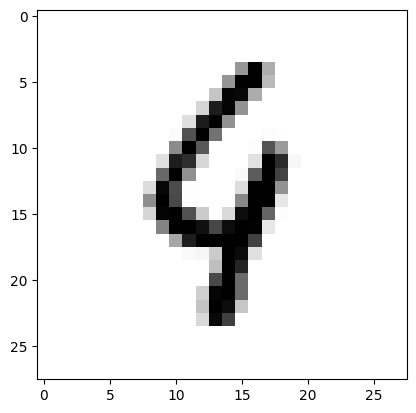

Значение сети: 8


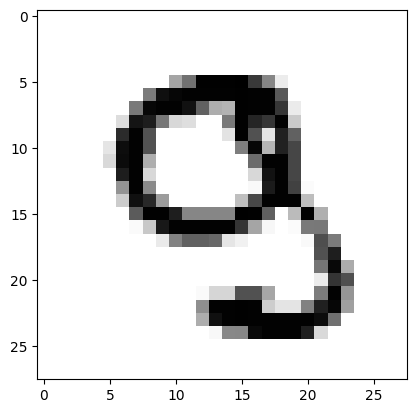

Значение сети: 2


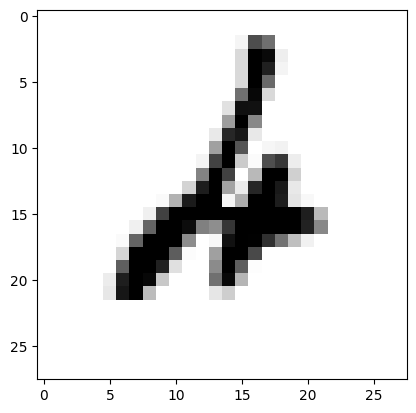

Значение сети: 0


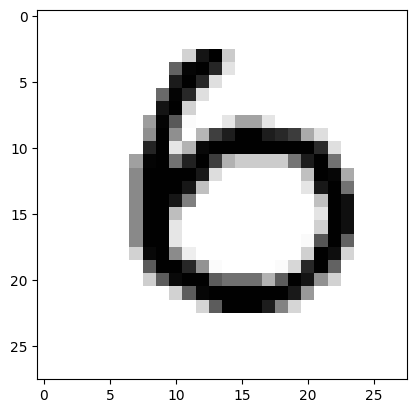

Значение сети: 7


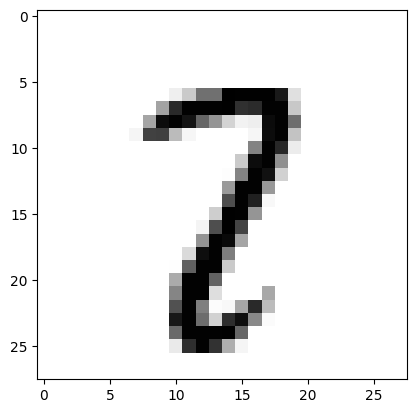

In [9]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:5])
print(y_test[:5])

mask = pred == y_test

x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

In [11]:
his_20000 = model.fit(x_train_20000, y_train_20000, batch_size=32, epochs=5, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/5
625/625 [==============================] - 4s 6ms/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.0743 - val_accuracy: 0.9800
Epoch 2/5
625/625 [==============================] - 2s 4ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0781 - val_accuracy: 0.9788
Epoch 3/5
625/625 [==============================] - 2s 4ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0815 - val_accuracy: 0.9794
Epoch 4/5
625/625 [==============================] - 3s 5ms/step - loss: 0.0279 - accuracy: 0.9900 - val_loss: 0.0842 - val_accuracy: 0.9786
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9781


[0.07792948931455612, 0.9781000018119812]

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2521 - accuracy: 0.9253 - val_loss: 0.1394 - val_accuracy: 0.9579
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1429 - accuracy: 0.9572 - val_loss: 0.1085 - val_accuracy: 0.9686
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 0.0910 - val_accuracy: 0.9725
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0868 - val_accuracy: 0.9741
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0815 - accuracy: 0.9740 - val_loss: 0.0819 - val_accuracy: 0.9753
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9765 - val_loss: 0.0790 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0647 - accuracy: 0.9798 - val_loss: 0.0754 - val_accuracy:

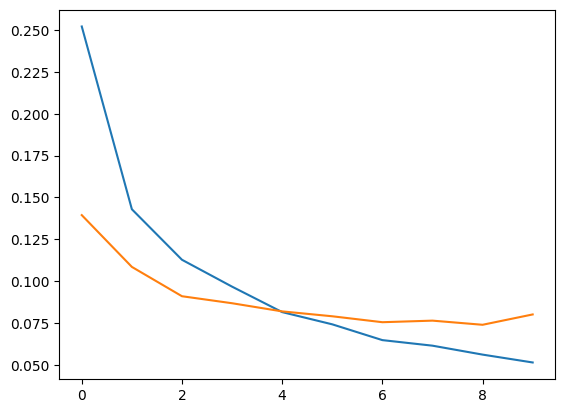

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9775


[0.07882245630025864, 0.9775000214576721]

In [12]:
model =  create_model()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

model.evaluate(x_test, y_test_cat)

In [13]:
model = KerasClassifier(model=create_model, verbose=1)

### 4

In [14]:
param_grid = {

    'optimizer': [Adam(learning_rate=0.01), Adam(learning_rate=0.1),Adam(learning_rate=0.15),
                  RMSprop(learning_rate=0.01), RMSprop(learning_rate=0.1) ,RMSprop(learning_rate=0.15),
                  SGD(learning_rate=0.01), SGD(learning_rate=0.1) ,SGD(learning_rate=0.15),
                  ]
}

In [15]:
def gridSearch(param_grid):
  grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
  grid_result = grid.fit(x_train, y_train_cat, validation_data=(x_valid, y_valid))
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  results = pd.DataFrame(grid_result.cv_results_)
  return results

In [16]:
gridSearch(param_grid= param_grid)

1563/1563 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9236 - val_loss: 0.1313 - val_accuracy: 0.9603
Best: 0.954220 using {'optimizer': <keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x7bffb97cd6f0>}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.719081,2.906936,2.979582,0.856654,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.952121,0.952241,0.951698,0.95202,0.000233,6
1,9.025285,1.996600,1.972860,0.713308,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.954101,0.950681,0.954038,0.95294,0.001598,3
2,8.558841,2.104182,2.089671,0.672586,<keras.src.optimizers.legacy.adam.Adam object ...,{'optimizer': <keras.src.optimizers.legacy.ada...,0.947021,0.948281,0.950018,0.94844,0.001229,9
3,7.528487,0.780916,2.325127,0.466692,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.949301,0.952601,0.954938,0.95228,0.002313,5
4,9.745033,1.358152,1.962361,0.592535,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.952421,0.953081,0.953798,0.95310,0.000562,2
5,8.612691,2.352414,4.096136,1.809429,<keras.src.optimizers.legacy.rmsprop.RMSprop o...,{'optimizer': <keras.src.optimizers.legacy.rms...,0.954221,0.953381,0.955058,0.95422,0.000685,1
6,7.153502,0.678092,2.683221,0.543697,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.953081,0.948761,0.951698,0.95118,0.001801,8
7,7.535120,0.555794,2.912197,0.044201,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.953621,0.950261,0.951278,0.95172,0.001407,7
8,7.089590,1.584928,3.464755,1.862586,<keras.src.optimizers.legacy.gradient_descent....,{'optimizer': <keras.src.optimizers.legacy.gra...,0.954641,0.951281,0.951818,0.95258,0.001474,4


### 5

In [29]:
for act in ['relu', 'softmax', 'linear','tanh']:
  model =  create_model(activation=act)
  his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

  print(act,' ',model.evaluate(x_test, y_test_cat))

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2498 - accuracy: 0.9257 - val_loss: 0.1346 - val_accuracy: 0.9584
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1401 - accuracy: 0.9588 - val_loss: 0.1093 - val_accuracy: 0.9665
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1119 - accuracy: 0.9666 - val_loss: 0.0925 - val_accuracy: 0.9720
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0958 - accuracy: 0.9714 - val_loss: 0.0827 - val_accuracy: 0.9746
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0809 - accuracy: 0.9750 - val_loss: 0.0809 - val_accuracy: 0.9760
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9763 - val_loss: 0.0751 - val_accuracy: 0.9772
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0665 - accuracy: 0.9786 - val_loss: 0.0729 - val_accuracy:

### 7

In [18]:
model =  create_model(loss='mean_squared_error')
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0120 - accuracy: 0.9195 - val_loss: 0.0070 - val_accuracy: 0.9532
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0069 - accuracy: 0.9563 - val_loss: 0.0055 - val_accuracy: 0.9640
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0056 - accuracy: 0.9648 - val_loss: 0.0049 - val_accuracy: 0.9681
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9687 - val_loss: 0.0045 - val_accuracy: 0.9701
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0043 - accuracy: 0.9731 - val_loss: 0.0043 - val_accuracy: 0.9714
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0040 - accuracy: 0.9750 - val_loss: 0.0041 - val_accuracy: 0.9737
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0037 - accuracy: 0.9765 - val_loss: 0.0039 - val_accuracy:

[27.337656021118164, 0.09950000047683716]

In [36]:
model =  create_model(loss='binary_crossentropy')
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9083 - val_loss: 0.0349 - val_accuracy: 0.9504
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9459 - val_loss: 0.0283 - val_accuracy: 0.9574
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0313 - accuracy: 0.9561 - val_loss: 0.0247 - val_accuracy: 0.9638
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0275 - accuracy: 0.9622 - val_loss: 0.0229 - val_accuracy: 0.9670
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9656 - val_loss: 0.0215 - val_accuracy: 0.9701
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0234 - accuracy: 0.9689 - val_loss: 0.0205 - val_accuracy: 0.9715
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0219 - accuracy: 0.9708 - val_loss: 0.0194 - val_accuracy:

[0.017393911257386208, 0.9754999876022339]

### 6

In [35]:
model =  create_model(bias=False)
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2482 - accuracy: 0.9252 - val_loss: 0.1347 - val_accuracy: 0.9617
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1390 - accuracy: 0.9578 - val_loss: 0.1047 - val_accuracy: 0.9683
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1087 - accuracy: 0.9677 - val_loss: 0.0961 - val_accuracy: 0.9700
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.0831 - val_accuracy: 0.9732
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0782 - val_accuracy: 0.9753
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0796 - val_accuracy: 0.9744
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0645 - accuracy: 0.9784 - val_loss: 0.0747 - val_accurac

[0.07710732519626617, 0.9778000116348267]

In [32]:
model =  create_model()
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))
model.evaluate(x_test, y_test_cat)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9259 - val_loss: 0.1286 - val_accuracy: 0.9616
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1353 - accuracy: 0.9603 - val_loss: 0.1007 - val_accuracy: 0.9697
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1065 - accuracy: 0.9675 - val_loss: 0.0881 - val_accuracy: 0.9725
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9727 - val_loss: 0.0838 - val_accuracy: 0.9739
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0760 - accuracy: 0.9758 - val_loss: 0.0864 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9796 - val_loss: 0.0741 - val_accuracy: 0.9774
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0614 - accuracy: 0.9807 - val_loss: 0.0720 - val_accuracy:

[0.07148518413305283, 0.977400004863739]

### 8

In [33]:
batch_sizes = [16, 32, 64, 128, 256]
score = []
for batch_size in batch_sizes:
    model = create_model()
    model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=10, validation_data=(x_valid, y_valid))
    score.append({batch_size: model.evaluate(x_test, y_test_cat, verbose=0)})

Epoch 1/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.2530 - accuracy: 0.9234 - val_loss: 0.1362 - val_accuracy: 0.9602
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1429 - accuracy: 0.9576 - val_loss: 0.1130 - val_accuracy: 0.9666
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1114 - accuracy: 0.9649 - val_loss: 0.0875 - val_accuracy: 0.9734
Epoch 4/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0907 - accuracy: 0.9713 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0801 - accuracy: 0.9749 - val_loss: 0.0783 - val_accuracy: 0.9767
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0723 - accuracy: 0.9765 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 7/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0659 - accuracy: 0.9792 - val_loss: 0.0766 - val_accurac

In [34]:
score

[{16: [0.07844255119562149, 0.9800999760627747]},
 {32: [0.07763683795928955, 0.9779000282287598]},
 {64: [0.07159138470888138, 0.9776999950408936]},
 {128: [0.06727094948291779, 0.9793000221252441]},
 {256: [0.07758907973766327, 0.975600004196167]}]

1/1 [==============================] - 0s 19ms/step
5


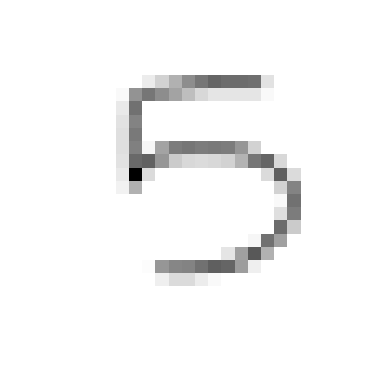

In [25]:
from PIL import Image
from keras.models import load_model

image_path = '5.png'
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0
image = np.reshape(image, (1, 28, 28))

print(np.argmax(model.predict(image)))

plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()